# Plotting

:::{hint}
There are many other libraries for plotting self-labelled data, especially
for :class:`pandas.DataFrame` objects, which can easily be generated
from a :class:`xarray.Dataset` using e.g.:

```python
ds = harvester.full_ds
df = ds.to_dataframe().reset_index()
```
Notably:

- [xarray](http://xarray.pydata.org/en/stable/plotting.html) itself has plotting functionality
- [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html) itself has plotting functionality
- [seaborn](https://seaborn.pydata.org/) uses `matlotlib` for plotting dataframes
- [holoviews](https://holoviews.org/) uses `bokeh` for plotting dataframes
- [hvplot](https://hvplot.holoviz.org/) builds on `holoviews` for plotting datasets
- [altair](https://altair-viz.github.io/) for dataframes
:::

The plotting functionality in ``xyzpy`` has a few focuses:

* Easily show the dependence of quantities on up to 4 parameters at once,
  including a colormapped third axis into the page , ``z=coo``, even for histograms.

* Provide the same interface to an interactive plotter for exploring data and a
  static plotter for creating high quality figures. This is done using
  [bokeh](https://bokeh.pydata.org/en/latest/) and
  [matplotlib](https://matplotlib.org).

  In general, to switch between the two add/remove the prefix "i"
  (e.g. ``iheatmap``/``heatmap``).

* Supply **all** options as keywords and just suggest the right one when mis-spelt so you
  don't have to remember. Many options are shared between the matplotlib and bokeh
  backends (but since visually obvious, options do not error if unavailable).

* Access by name to extra perceptually uniform colormaps from
  [cmocean](https://matplotlib.org/cmocean/) and
  [colorcet](https://bokeh.github.io/colorcet/) if installed.


The following demonstrations show basic usage of all the plot types.
These can be called through the `xarray.Dataset` accessor attribute ``.xyz``.

First we'll define and label a function to explore, and run some nice combos:

- `x`
- `color`
- `hue`
- `marker`
- `markersize`
- `markeredgecolor`
- `linestyle`
- `linewidth`
- `col`
- `row`

In [1]:
%config InlineBackend.figure_formats = ['svg']

import numpy as np
import xarray as xr

import xyzpy as xyz


def singuass(x, a, l, phi):
    return np.sin(x / l - phi) * np.exp(-(x**2) / a)


r = xyz.Runner(singuass, "sg(x)")

combos = {
    "x": np.linspace(-4, 4, 52),
    "a": [1, 2, 3],
    "l": [0.2, 0.3, 0.4, 0.5, 0.6, 0.7],
    "phi": [0, 1],
}

ds = r.run_combos(combos)
ds

100%|##########| 1872/1872 [00:00<00:00, 526291.11it/s]


<xarray.Dataset>
Dimensions:  (x: 52, a: 3, l: 6, phi: 2)
Coordinates:
  * x        (x) float64 -4.0 -3.843 -3.686 -3.529 ... 3.529 3.686 3.843 4.0
  * a        (a) int64 1 2 3
  * l        (l) float64 0.2 0.3 0.4 0.5 0.6 0.7
  * phi      (phi) int64 0 1
Data variables:
    sg(x)    (x, a, l, phi) float64 -1.027e-07 -9.415e-08 ... -0.004828

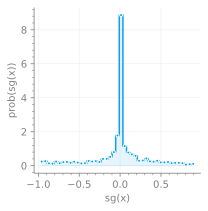

(<Figure size 300x300 with 1 Axes>,
 array([[<Axes: xlabel='sg(x)', ylabel='prob(sg(x))'>]], dtype=object))

In [2]:
ds.xyz.plot("sg(x)")

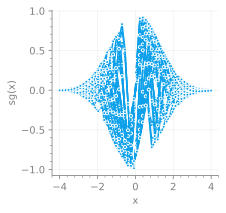

(<Figure size 300x300 with 1 Axes>,
 array([[<Axes: xlabel='x', ylabel='sg(x)'>]], dtype=object))

In [3]:
ds.xyz.plot(x="x", y="sg(x)")

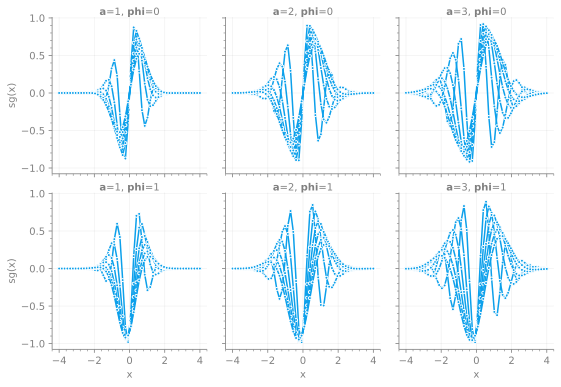

In [4]:
fig, axs = r.last_ds.xyz.infiniplot(
    x="x",
    y="sg(x)",
    col="a",
    row="phi",
)

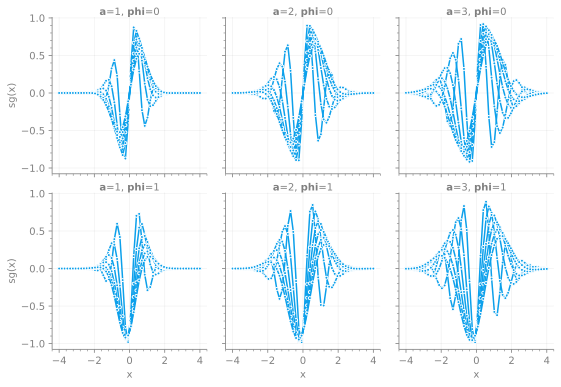

In [5]:
fig, axs = r.last_ds.xyz.infiniplot(
    x="x",
    y="sg(x)",
    col="a",
    row="phi",
)

False
0.9820705631189453


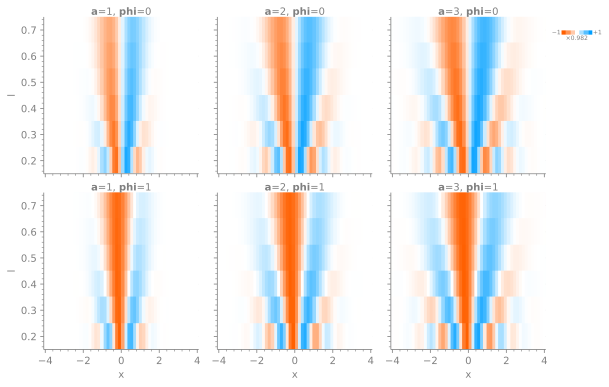

In [6]:
fig, axs = ds.xyz.infiniplot(
    x="x",
    y="l",
    z="sg(x)",
    col="a",
    row="phi",
)

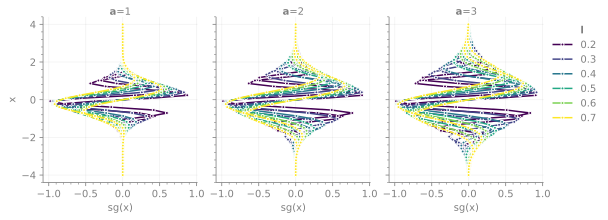

(<Figure size 900x300 with 3 Axes>,
 array([[<Axes: xlabel='sg(x)', ylabel='x'>, <Axes: xlabel='sg(x)'>,
         <Axes: xlabel='sg(x)'>]], dtype=object))

In [44]:
# note we have dropped the 'row' specification but can still plot all the data
ds.xyz.infiniplot(
    x="sg(x)",
    y="x",
    hue="l",
    col="a",
    palette="viridis",
)

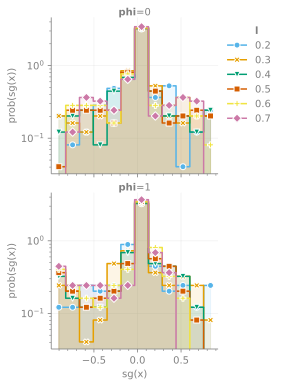

(<Figure size 300x600 with 2 Axes>,
 array([[<Axes: ylabel='prob(sg(x))'>],
        [<Axes: xlabel='sg(x)', ylabel='prob(sg(x))'>]], dtype=object))

In [61]:
# note we have dropped the col specification
ds.xyz.infiniplot(
    x="sg(x)",
    hue="l",
    marker="l",
    row="phi",
    # bins=11,
    yscale="log",
    # ylog=True,
    # stacked=True,
    # colors=True,
    # palette='viridis',
    # width=6,
    # figsize=(6, 4)
)